In [1]:
import sys
import itertools
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../')
from hamp_pred.src.predictor import Predictor
from hamp_pred.src.input_prep.prepare_sequence import MultiChainOperator, SeqWindow
from hamp_pred.src.input_prep.encode import RadianEncoder, MultiEncoder, OneHotEncoderSeq, RadiousPhobosEncoder
from hamp_pred.src.predictor_config import  PredictionConfig
from hamp_pred.src.models.common.models import BaseConvolutionalWrapper

2023-04-28 13:28:06.442676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 13:28:06.579184: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-28 13:28:07.134730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-28 13:28:07.134818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
# load prediction model
operator = MultiChainOperator(MultiEncoder([RadiousPhobosEncoder(), OneHotEncoderSeq()]), SeqWindow(11, 11), RadianEncoder(100),  SeqWindow(11, 11, null_char=[[0]]),
                                      parallel=True)
model_conf = {'activation': 'tanh',
 'norm': True,
 'n_layers': 3,
 'kernel_sizes': (3, 4, 7),
 'lstm': 2,
 'dense': 1,
 'reshape_out': False,
 'epochs': 100,
 'task': 'hamp_rot',
 'version': '3_4_7_3_2_1',
 'data_dir': '/home/users/sdunin/calc/HAMPpred/data/output/weights/hamp_rot/3_4_7_3_2_1'}

conf = PredictionConfig(BaseConvolutionalWrapper, operator, model_conf)
clf_main = Predictor('hamp_rot', config=conf,
                    version=model_conf['data_dir'].split('/')[-1])


In [10]:
#data from:
# https://journals.asm.org/action/downloadSupplement?doi=10.1128%2FmBio.00616-15&file=mbo003152324st1.pdf

mut_data = '''
R219C        2.27         R236S       15.63
P220H        3.16         L239F        7.09
I221N        1.29         L239P        5.60
R226W        3.02         P241L        1.84
E227V        2.74         P241T        1.46
E227K       15.10         E242K        1.37
V228I        3.64         T244K        9.68
R229L        4.97         R245C        2.35
E230A       13.29         R245L        9.63
E230G       19.33         E246D        2.02
E230K       12.48         L247Q        4.35
L231F        5.27         L247P        7.74
L231R        3.24         L250H        2.09
L231I       12.12         R252C        2.08
L231V        9.05         L254I        8.79
L231P       11.63         L254F       26.59
E232G       17.52         L254V        3.73
E232K       36.16         N255T       21.78
E232V       16.41         N255I       24.46
D233G        1.14         L257Q        0.84
D233Y        2.26         L258F        6.39
D233V        3.99         E261K       13.28
H234Q        5.69         Y265C       14.78
R236H       19.33         N266S        4.68
'''

mutlist = []

def parse_mut(mut):
    wt = mut[0]
    m = mut[-1]
    pos = int(mut[1:-1])
    return wt, pos, m

for l in mut_data.split('\n'):
    l = l.strip()
    if l == '': continue
    
    ll = re.split(r'\s{1,}', l)
    mutlist.append((list(parse_mut(ll[0])) + [float(ll[1])]))
    
    mutlist.append((list(parse_mut(ll[2])) + [float(ll[3])]))

mutlist

[['R', 219, 'C', 2.27],
 ['R', 236, 'S', 15.63],
 ['P', 220, 'H', 3.16],
 ['L', 239, 'F', 7.09],
 ['I', 221, 'N', 1.29],
 ['L', 239, 'P', 5.6],
 ['R', 226, 'W', 3.02],
 ['P', 241, 'L', 1.84],
 ['E', 227, 'V', 2.74],
 ['P', 241, 'T', 1.46],
 ['E', 227, 'K', 15.1],
 ['E', 242, 'K', 1.37],
 ['V', 228, 'I', 3.64],
 ['T', 244, 'K', 9.68],
 ['R', 229, 'L', 4.97],
 ['R', 245, 'C', 2.35],
 ['E', 230, 'A', 13.29],
 ['R', 245, 'L', 9.63],
 ['E', 230, 'G', 19.33],
 ['E', 246, 'D', 2.02],
 ['E', 230, 'K', 12.48],
 ['L', 247, 'Q', 4.35],
 ['L', 231, 'F', 5.27],
 ['L', 247, 'P', 7.74],
 ['L', 231, 'R', 3.24],
 ['L', 250, 'H', 2.09],
 ['L', 231, 'I', 12.12],
 ['R', 252, 'C', 2.08],
 ['L', 231, 'V', 9.05],
 ['L', 254, 'I', 8.79],
 ['L', 231, 'P', 11.63],
 ['L', 254, 'F', 26.59],
 ['E', 232, 'G', 17.52],
 ['L', 254, 'V', 3.73],
 ['E', 232, 'K', 36.16],
 ['N', 255, 'T', 21.78],
 ['E', 232, 'V', 16.41],
 ['N', 255, 'I', 24.46],
 ['D', 233, 'G', 1.14],
 ['L', 257, 'Q', 0.84],
 ['D', 233, 'Y', 2.26],
 ['L'

In [11]:
def get_helices(seq):
    h1 = seq[6:17]
    h2 = seq[32:43]
    return h1+h2

seq_start = 215
seq = 'WWSLRPIEALAREVRELEDHHREMLNPETTRELTSLVRNLNQLLKSERERYN'
seq_min = get_helices(seq)

res = []

for m in mutlist:
    pos = m[1]-seq_start
    assert seq[pos] == m[0]
    mutseq = seq[:pos] + m[2] + seq[pos+1:]
    mutseq_min = get_helices(mutseq)
    
    if mutseq_min == seq_min: continue # mutation outside the hamppred range
        
    res.append((mutseq_min, m[3]))
    
res_df = pd.DataFrame(res, columns=['sequence', 'activity'])

In [12]:
pred = clf_main.predict(res_df.sequence.tolist())

1/1 [==============================] - 1s 1s/step


In [13]:
res_df['full_pred'] = pred.predicted_rotation.apply(lambda i: np.array(list(itertools.chain(*i))))

In [14]:
res_df['pred'] = res_df['full_pred'].apply(np.mean)

(-26.0, 26.0)

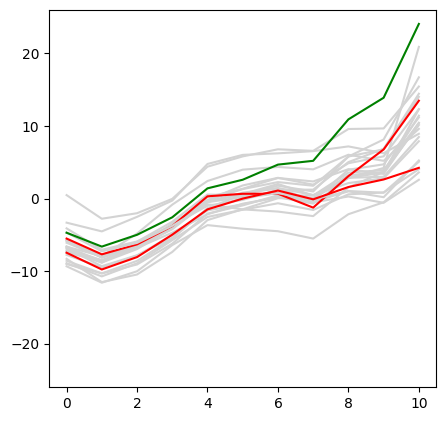

In [15]:
fig, ax = plt.subplots(1,1, figsize=(5, 5), dpi=100)

for k, v in res_df.iterrows():
    if v.activity > 24:
        c='red'
    elif v.activity < 1:
        c='green'
    else:
        c='lightgray'
    ax.plot(v.full_pred, c=c)
    
ax.set_ylim(-26, 26)

## 

/home/users/sdunin/miniconda3/envs/jup/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='pred', ylabel='activity'>

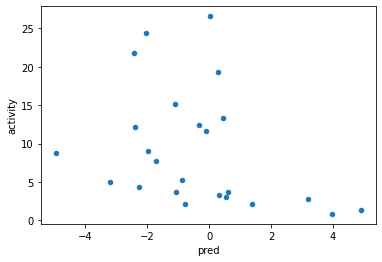

In [16]:
res_df.plot.scatter(x='pred', y='activity')